# How-to: Creating a simple map

Sometimes it is helpful to be able to look at data geographically. In this how-to, we will see how we can use the package [geopandas](https://geopandas.org/en/stable/) to import data in [geojson](https://geojson.org) format. Then we show how we can relatively easily visualise data on a map. We also show how to use the [geoplot](https://residentmario.github.io/geoplot/) to quickly create some common data-maps.

We start by loading in our data. You may need to install geopandas first by, for example, using the following command in your terminal: 

    conda install -c conda-forge geopandas 

See the Geopandas [getting started](https://geopandas.org/en/stable/getting_started.html) for more details on installation. 

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


import geopandas as gpd
import geoplot as gplt

geopandas has a built-in data-import function, *read_file()*, that will automatically recognize several types of geographic data. 

Below we will load in a file describing the boundaries of all Norwegian municipalities (kommuner). This is a big file, so it can take a minute to load.

(I assembled this dataset from the [open API from geonorge](frhttps://ws.geonorge.no/kommuneinfo/v1/#/default/get_kommuner__kommunenummer__omrade))

In [49]:
kommunerShapeDF = gpd.read_file("https://jmaurit.github.io/anv_statistikk/data/kommunerShapeDF.geojson")


We can look at the geopandas dataframe and notice that it looks much like a normal Pandas dataframe, and that is in large part because it is. The differentiating factor is the *geometry* column, which contains the information to define the borders of each municipality (kommune). 

In [50]:
kommunerShapeDF

,kommunenavn,area,kommunenummer,knummer,geometry
0,TRYSIL,NO1,3421.0,3421,"MULTIPOLYGON (((11.84062 61.39303, 11.84107 61..."
1,OSLO,NO1,301.0,0301,"MULTIPOLYGON (((10.57524 59.98690, 10.57560 59..."
2,BÆRUM,NO1,3024.0,3024,"MULTIPOLYGON (((10.36939 59.93179, 10.36975 59..."
3,NORDRE FOLLO,NO1,3020.0,3020,"MULTIPOLYGON (((10.80297 59.73705, 10.80294 59..."
4,NITTEDAL,NO1,3031.0,3031,"MULTIPOLYGON (((10.76484 60.09539, 10.76520 60..."
...,...,...,...,...,...
351,HASVIK,NO4,5433.0,5433,"MULTIPOLYGON (((21.38443 70.60313, 21.71121 70..."
352,HATTFJELLDAL,NO4,1826.0,1826,"MULTIPOLYGON (((13.82300 65.45053, 13.82294 65..."
353,VEVELSTAD,NO4,1816.0,1816,"MULTIPOLYGON (((12.23998 65.69494, 12.22693 65..."
354,GRANE,NO4,1825.0,1825,"MULTIPOLYGON (((13.17622 65.48674, 13.06642 65..."


geopandas has a quick plot function to create a plot (this is built on matplotlib). 

<AxesSubplot:>

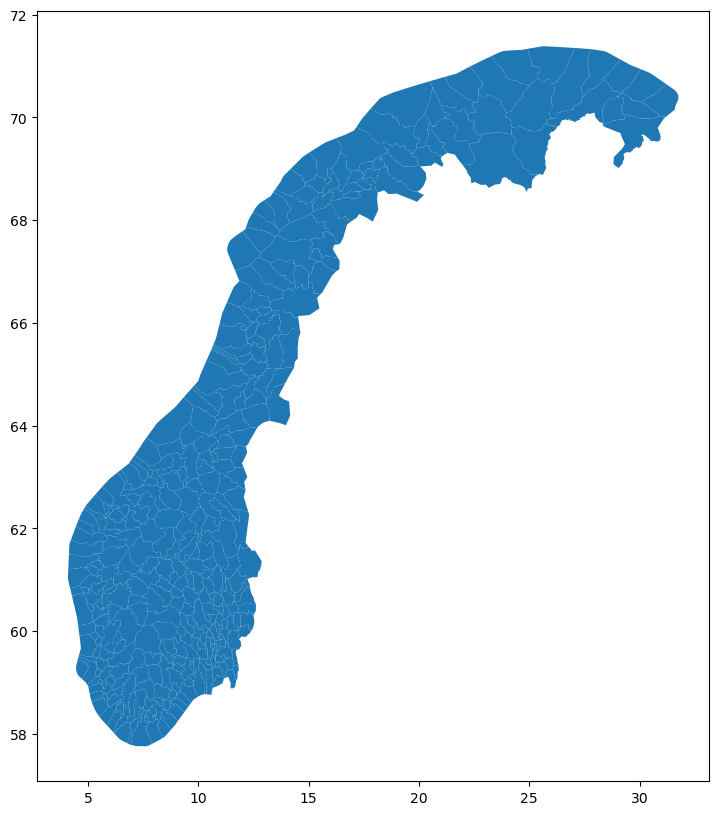

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
kommunerShapeDF.plot(ax=ax)

We can add some text to the chart indicating the location of the larger cities in Norway. Here I include the standard latitude and longitude of 6 cities in Norway: 

In [52]:
cityLabs = ["Oslo", "Bergen", "Trondheim", "Stavanger", "Tromsø", "Kristiansand"]
long = [10.7, 5.3, 10.4, 5.7, 19.0, 8.0]
lat = [59.9, 60.4, 63.4, 59.0, 69.6, 58.16]


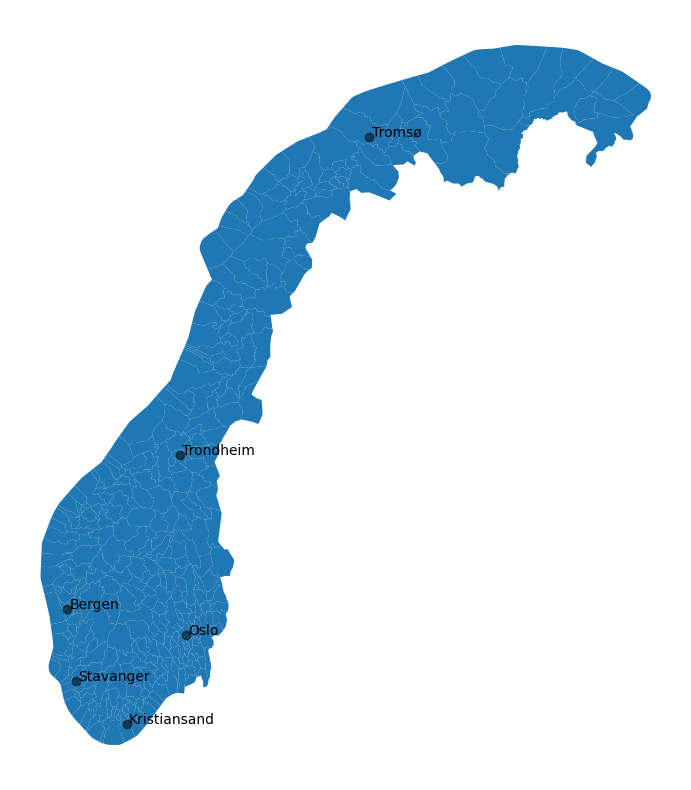

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
kommunerShapeDF.plot(ax=ax)
ax.set_axis_off()
i=0
ax.plot(long, lat, "o", color="black", alpha=.5)
for city in cityLabs: 
    ax.text(long[i]+.1, lat[i], city)
    i+=1

Now let's add some data on population and income for each municipality (see SSB [how-to](https://nbviewer.org/url/jmaurit.github.io/anv_statistikk/SSB_data.ipynb))

In [54]:
kommuneDF = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/kommunePopIncome.csv")

In [55]:
kommuneDF

,Unnamed: 0,region,year,contents,population,kommunenummer,med_income_at,med_income_bt
0,19,K-3001 Halden,2005,Persons,27582,3001,NaN,NaN
1,20,K-3001 Halden,2006,Persons,27722,3001,NaN,NaN
2,21,K-3001 Halden,2007,Persons,27835,3001,NaN,NaN
3,22,K-3001 Halden,2008,Persons,28092,3001,NaN,NaN
4,23,K-3001 Halden,2009,Persons,28389,3001,NaN,NaN
...,...,...,...,...,...,...,...,...
6403,13167,K-5444 Sør-Varanger,2018,Persons,10171,5444,NaN,NaN
6404,13168,K-5444 Sør-Varanger,2019,Persons,10156,5444,NaN,NaN
6405,13169,K-5444 Sør-Varanger,2020,Persons,10158,5444,539000.0,668000.0
6406,13170,K-5444 Sør-Varanger,2021,Persons,10103,5444,NaN,NaN


Let's look at data only for the year 2020

In [56]:
kommune2020DF = kommuneDF.loc[kommuneDF.year==2020,:].copy()

We want to combine our data on the municipality number (kommunenummer).

Then we are ready to merge together our data frames

In [57]:
kommune2020DF.dtypes

Unnamed: 0         int64
region            object
year               int64
contents          object
population         int64
kommunenummer      int64
med_income_at    float64
med_income_bt    float64
dtype: object

to merge, we will use *pd.merge()* and then convert back to a geopandas data frame

In [58]:
kommunerShapeDF = pd.merge(kommunerShapeDF, kommune2020DF, how="left", on="kommunenummer")

Now we'll create what is called a *choropleth map* where continuous values of a variable are translated into shades of a color. In this case we will look at median incomes per municipality:

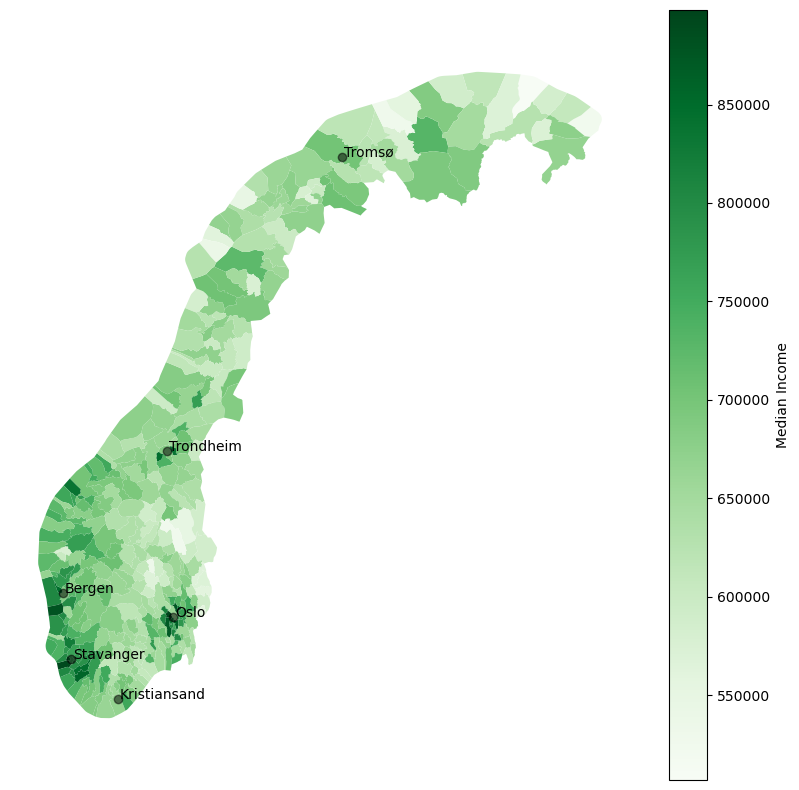

In [59]:
plt.style.use("default")
fig, ax = plt.subplots(1, 1, figsize=(10,10))
kommunerShapeDF.plot(column="med_income_bt", 
                     ax=ax, 
                     cmap="Greens",
                     legend=True, 
                     legend_kwds = {"label":"Median Income"}
                     )
ax.set_axis_off()
i=0
ax.plot(long, lat, "o", color="black", alpha=.5)
for city in cityLabs: 
    ax.text(long[i]+.1, lat[i], city)
    i+=1


You can see more details about making maps with geopandas on the [Geopandas online documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html)